SENTIMENTAL ANALYSIS PROJECT WITH NAIVE BAYES

In [173]:
#For installing pips

In [174]:
#Import library

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud

import nltk
from nltk.corpus import stopwords
stop_words = stopwords.words()

from nltk.stem import WordNetLemmatizer
import re
import string

In [175]:
#importing the dataset
df = pd.read_csv('../Dataset/dataset_small.csv')
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [176]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     999 non-null    object
 1   sentiment  999 non-null    object
dtypes: object(2)
memory usage: 15.7+ KB


In [177]:
df.describe()

,review,sentiment
count,999,999
unique,999,2
top,One of the other reviewers has mentioned that ...,positive
freq,1,501


DATA ANALYSIS

In [178]:
#Sentiment Count
df['sentiment'].value_counts()

positive    501
negative    498
Name: sentiment, dtype: int64

<AxesSubplot: >

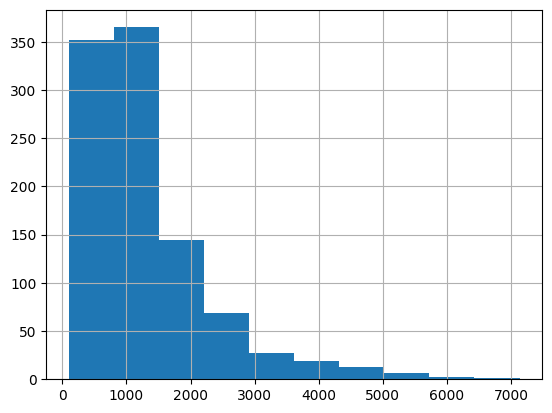

In [179]:
df['review'].str.len().hist()

Text(0.5, 1.0, 'Negative Reviews')

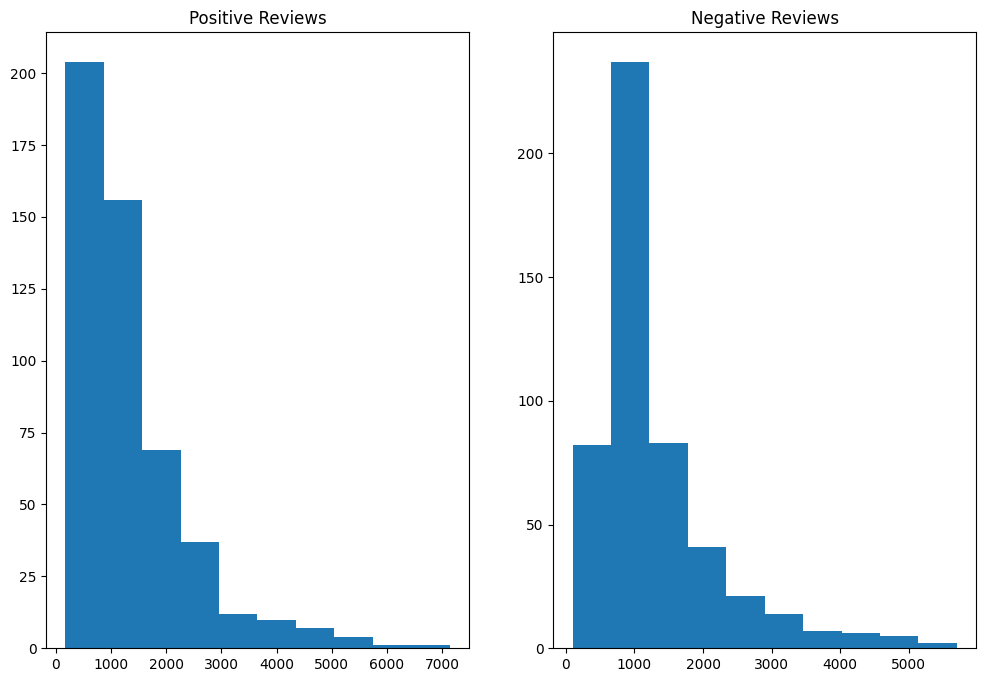

In [180]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(12,8))
ax1.hist(df[df['sentiment']=='positive']['review'].str.len())
ax1.set_title( 'Positive Reviews')
ax2.hist(df[df['sentiment']=='negative']['review'].str.len())
ax2.set_title( 'Negative Reviews')

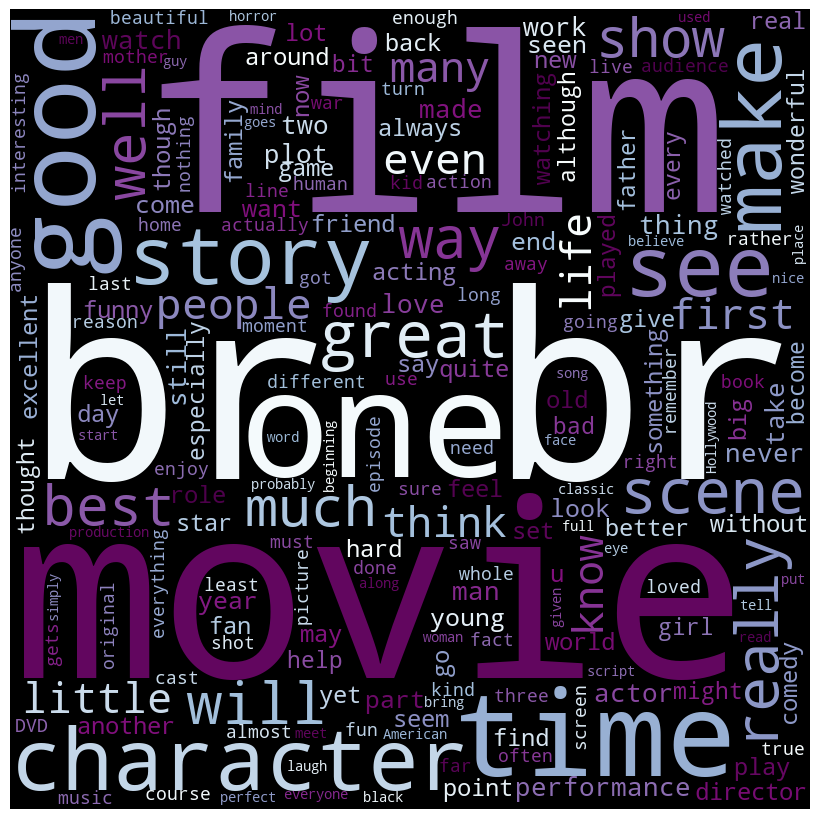

In [181]:
#WordCLoud of most freq POSITIVE Review Words

text = " ".join(i for i in df[df['sentiment']=='positive']['review'])

wordcloud = WordCloud(width = 800, height = 800, background_color ='black',  min_font_size = 10, colormap='BuPu', contour_width=3, contour_color='steelblue').generate(text)

plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
  
plt.show()

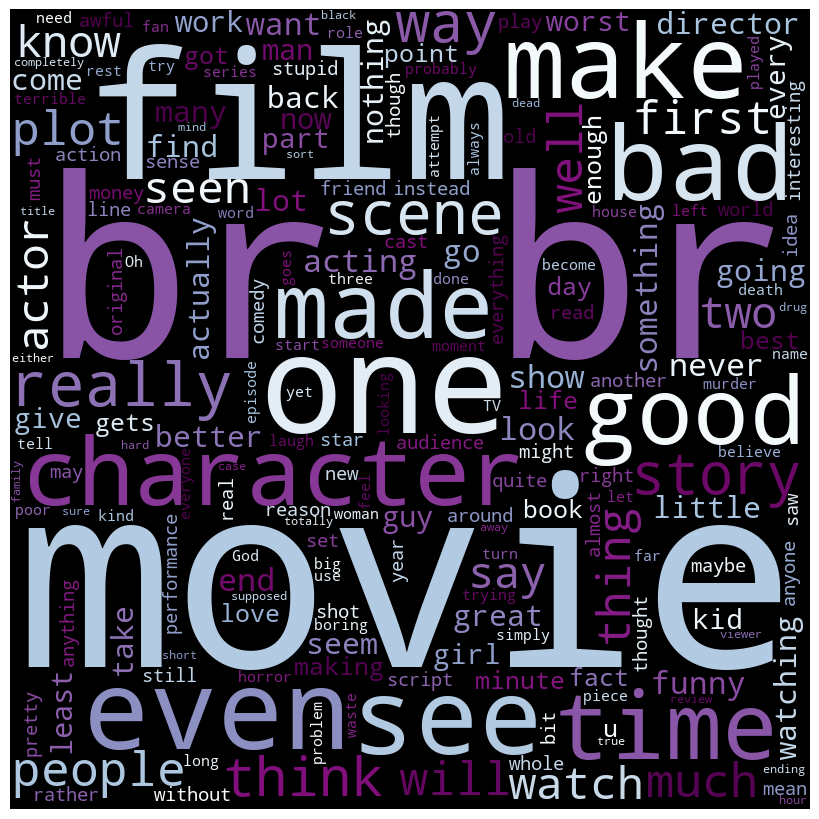

In [182]:
#WordCLoud of most freq Negative Review Words

text = " ".join(i for i in df[df['sentiment']=='negative']['review'])

wordcloud = WordCloud(width = 800, height = 800, background_color ='black',  min_font_size = 10, colormap='BuPu', contour_width=3, contour_color='steelblue').generate(text)

plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
  
plt.show()

PREPROCESSING

In [183]:
# At First Data have to be cleaned

def cleaning(text):
    text = text.lower()  # converting to lowercase


    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    
    text = emoji_pattern.sub(r'', text) 



    # removing short form: 
    
    text=re.sub("isn't",'is not',text)
    text=re.sub("aren't",'are not',text)
    text=re.sub("he's",'he is',text)
    text=re.sub("wasn't",'was not',text)
    text=re.sub("there's",'there is',text)
    text=re.sub("couldn't",'could not',text)
    text=re.sub("won't",'will not',text)
    text=re.sub("they're",'they are',text)
    text=re.sub("she's",'she is',text)
    text=re.sub("There's",'there is',text)
    text=re.sub("wouldn't",'would not',text)
    text=re.sub("haven't",'have not',text)
    text=re.sub("That's",'That is',text)
    text=re.sub("you've",'you have',text)
    text=re.sub("He's",'He is',text)
    text=re.sub("what's",'what is',text)
    text=re.sub("weren't",'were not',text)
    text=re.sub("we're",'we are',text)
    text=re.sub("hasn't",'has not',text)
    text=re.sub("you'd",'you would',text)
    text=re.sub("shouldn't",'should not',text)
    text=re.sub("let's",'let us',text)
    text=re.sub("they've",'they have',text)
    text=re.sub("You'll",'You will',text)
    text=re.sub("i'm",'i am',text)
    text=re.sub("we've",'we have',text)
    text=re.sub("it's",'it is',text)
    text=re.sub("don't",'do not',text)
    text=re.sub("that´s",'that is',text)
    text=re.sub("I´m",'I am',text)
    text=re.sub("it’s",'it is',text)
    text=re.sub("she´s",'she is',text)
    text=re.sub("he’s'",'he is',text)
    text=re.sub('I’m','I am',text)
    text=re.sub('I’d','I did',text)
    text=re.sub("he’s'",'he is',text)
    text=re.sub('there’s','there is',text)


    text = re.sub('https?://\S+|www\.\S+', '', text) # removing URL links
    text = re.sub(r"\b\d+\b", "", text) # removing number 
    text = re.sub('<.*?>+', '', text) # removing special characters
    text = text.translate(str.maketrans('','',string.punctuation)) #punctuations
    text = re.sub('\n', '', text)
    text = re.sub('[’“”…]', '', text)

    return text


#creating a new list of each review by applying cleaning function
dt = df['review'].apply(cleaning)
dt.head()


    


0    one of the other reviewers has mentioned that ...
1    a wonderful little production the filming tech...
2    i thought this was a wonderful way to spend ti...
3    basically there is a family where a little boy...
4    petter matteis love in the time of money is a ...
Name: review, dtype: object

In [184]:
#Creating a dataframe by the new dt and the previous sentiment
dt = pd.DataFrame(dt)
dt['sentiment'] = df['sentiment']

dt.head()

,review,sentiment
0,one of the other reviewers has mentioned that ...,positive
1,a wonderful little production the filming tech...,positive
2,i thought this was a wonderful way to spend ti...,positive
3,basically there is a family where a little boy...,negative
4,petter matteis love in the time of money is a ...,positive


In [185]:
#Removing stopwords
dt['no_sw'] = dt['review'].apply(lambda x:' '.join([word for word in x.split() if word not in (stop_words)]))


In [186]:
dt.head()

,review,sentiment,no_sw
0,one of the other reviewers has mentioned that ...,positive,reviewers mentioned watching oz episode youll ...
1,a wonderful little production the filming tech...,positive,wonderful production filming technique unassum...
2,i thought this was a wonderful way to spend ti...,positive,wonderful spend time hot summer weekend sittin...
3,basically there is a family where a little boy...,negative,basically family boy jake thinks zombie closet...
4,petter matteis love in the time of money is a ...,positive,petter matteis love time money visually stunni...


In [187]:
# Working with the most Frequent Words: This words need to be removed, 
# because for these words, some rare valuable word in a text can not provide much info about sentiment.

from collections import Counter
cnt = Counter()

for text in dt["no_sw"].values:
    for word in text.split():
        cnt[word] += 1
cnt.most_common(10)
mst_common_words = pd.DataFrame(cnt.most_common(10))
mst_common_words.columns=['word', 'count']
mst_common_words


,word,count
0,movie,1704
1,film,1475
2,story,437
3,time,407
4,movies,336
5,great,334
6,made,334
7,make,291
8,films,285
9,plot,284


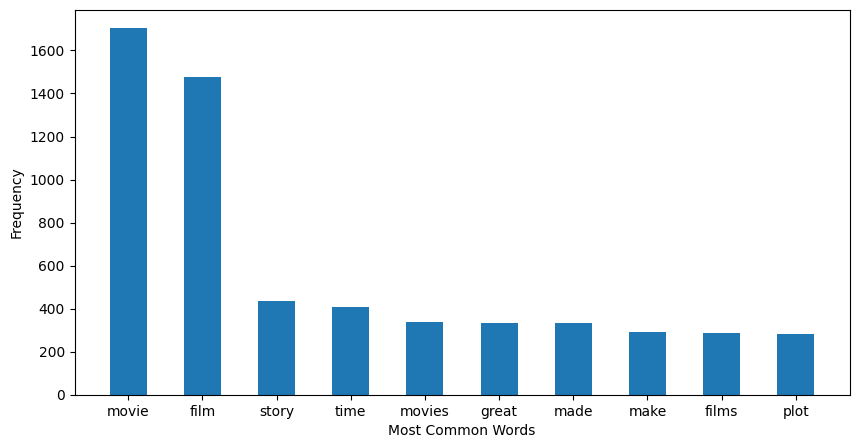

In [188]:
fig = plt.figure(figsize = (10, 5))

plt.bar(mst_common_words['word'], mst_common_words['count'], width = 0.5)

plt.xlabel("Most Common Words")
plt.ylabel("Frequency")
plt.show()

In [189]:
# Remove the most frequent words:
FREQWORDS = set([w for (w, wc) in cnt.most_common(10)])

def remove_freqwords(text):
    return " ".join([word for word in str(text).split() if word not in FREQWORDS])


dt["wo_stopfreq"] = dt["no_sw"].apply(lambda text: remove_freqwords(text))

dt.head()

,review,sentiment,no_sw,wo_stopfreq
0,one of the other reviewers has mentioned that ...,positive,reviewers mentioned watching oz episode youll ...,reviewers mentioned watching oz episode youll ...
1,a wonderful little production the filming tech...,positive,wonderful production filming technique unassum...,wonderful production filming technique unassum...
2,i thought this was a wonderful way to spend ti...,positive,wonderful spend time hot summer weekend sittin...,wonderful spend hot summer weekend sitting air...
3,basically there is a family where a little boy...,negative,basically family boy jake thinks zombie closet...,basically family boy jake thinks zombie closet...
4,petter matteis love in the time of money is a ...,positive,petter matteis love time money visually stunni...,petter matteis love money visually stunning wa...


In [190]:
# Lemmatization: Lemmatization is converting the word to its base form or lemma by removing affixes from the inflected words. 

wordnet_lem = WordNetLemmatizer()

dt['wo_stopfreq_lem'] = dt['wo_stopfreq'].apply(wordnet_lem.lemmatize)

dt.head()

,review,sentiment,no_sw,wo_stopfreq,wo_stopfreq_lem
0,one of the other reviewers has mentioned that ...,positive,reviewers mentioned watching oz episode youll ...,reviewers mentioned watching oz episode youll ...,reviewers mentioned watching oz episode youll ...
1,a wonderful little production the filming tech...,positive,wonderful production filming technique unassum...,wonderful production filming technique unassum...,wonderful production filming technique unassum...
2,i thought this was a wonderful way to spend ti...,positive,wonderful spend time hot summer weekend sittin...,wonderful spend hot summer weekend sitting air...,wonderful spend hot summer weekend sitting air...
3,basically there is a family where a little boy...,negative,basically family boy jake thinks zombie closet...,basically family boy jake thinks zombie closet...,basically family boy jake thinks zombie closet...
4,petter matteis love in the time of money is a ...,positive,petter matteis love time money visually stunni...,petter matteis love money visually stunning wa...,petter matteis love money visually stunning wa...


New Clean Dataframe

In [191]:
# create the cleaned dataframe

df1=dt.drop(columns=['review','no_sw', 'wo_stopfreq'])
df1.columns=['sentiment','review']
df1.sentiment = [0 if each == "negative" else 1 for each in df1.sentiment]
df1.head()

,sentiment,review
0,1,reviewers mentioned watching oz episode youll ...
1,1,wonderful production filming technique unassum...
2,1,wonderful spend hot summer weekend sitting air...
3,0,basically family boy jake thinks zombie closet...
4,1,petter matteis love money visually stunning wa...


In [205]:
#Bag of Words

# from sklearn.feature_extraction.text import CountVectorizer
# cv = CountVectorizer()
# text_counts = cv.fit_transform(df1['review'])

# TF -IDF 

from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()
text_counts = tfidf.fit_transform(df1['review'])



Train Test Split

In [193]:
from sklearn.model_selection import train_test_split
X=text_counts
y=df1['sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,random_state=30)

Naive Bayes Model

In [194]:
#Model Building and testing it and predicting the result

from sklearn.naive_bayes import MultinomialNB

MNB = MultinomialNB()
MNB.fit(X_train, y_train)

predicted = MNB.predict(X_test)

In [195]:
#Checking the accuracy
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import metrics

accuracy_score = metrics.accuracy_score(predicted, y_test)

print("Model accuracy is " + str('{:04.2f}'.format(accuracy_score*100)) + "%")


Model accuracy is 79.00%


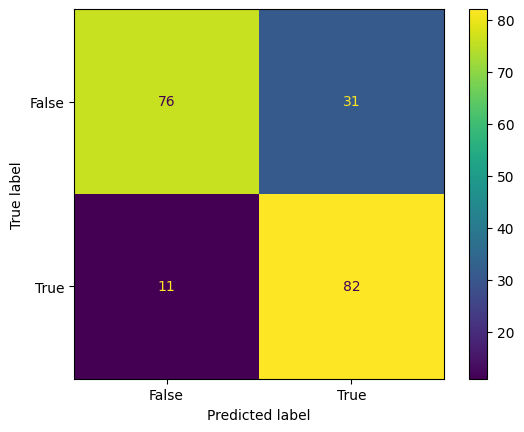

In [196]:
#Confussion metrics

confusion_matrix = metrics.confusion_matrix(y_test, predicted)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True,])

cm_display.plot()
plt.show()

In [197]:
# Classification Reports

print(classification_report(y_test, predicted))

              precision    recall  f1-score   support

           0       0.87      0.71      0.78       107
           1       0.73      0.88      0.80        93

    accuracy                           0.79       200
   macro avg       0.80      0.80      0.79       200
weighted avg       0.80      0.79      0.79       200



Saving It

In [198]:
import pickle

In [199]:
filename = "trained_practice.sav"
pickle.dump(MNB, open(filename, 'wb'))

In [206]:
filename = "trained_practice_tfidf.sav"
pickle.dump(tfidf, open(filename, 'wb'))

In [207]:
#Loading the saved model

loaded_model = pickle.load(open('trained_practice.sav', 'rb'))
loaded_tfidf = pickle.load(open('trained_practice_tfidf.sav', 'rb'))

In [208]:
input_string = "E:\STUDY\3_2\CSE 3200\Sentiment Analysis\NLTK\web_app.py"

In [209]:
clean_input_string = cleaning(input_string)
lemmatized_string = wordnet_lem.lemmatize(clean_input_string)
string_array = np.array([lemmatized_string])

string_vector = loaded_tfidf.transform(string_array)


In [210]:
predicted = loaded_model.predict(string_vector)

print(predicted)

[1]
